In [97]:
import env
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
%config InlineBackend.figure_format='retina'

In [98]:
def get_db_url(username, password, host, db):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

url = get_db_url(env.username, env.password, env.host, db='telco_churn')


### Answer with the type of stats test you would use (assume normal distribution):
- Is there a relationship between the length of your arm and the length of your foot?

Pearson 

- Do guys and gals quit their jobs at the same rate?

Independent T-Test

- Does the length of time of the lecture correlate with a students grade?
spearmean r

In [99]:
query = 'SELECT * FROM customers'
df= pd.read_sql(query, url)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   monthly_charges  7043 non-null   float64
 1   tenure           7043 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 110.2 KB


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

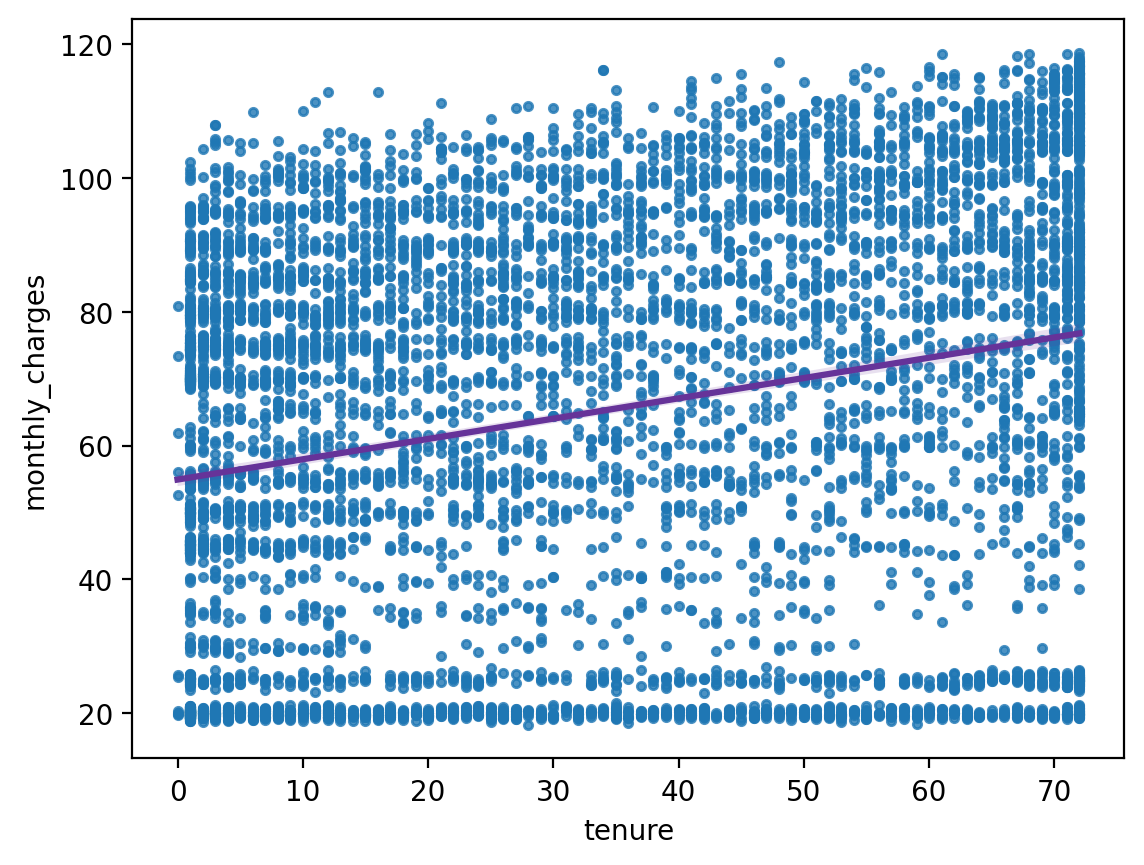

In [100]:
charges_df = df[['monthly_charges', 'tenure']]
charges_df.info()
sns.regplot(x='tenure', y='monthly_charges', 
            data=charges_df, marker='.', 
            line_kws={'color': 'rebeccapurple'})

Does tenure correlate with monthly charges?

- state our hypothesis, set our alpha value
- select the data, check for nulls
- plot the data
- test for assumptions (normal distribution for correlation)
- run test
- draw conclusions



<AxesSubplot:>

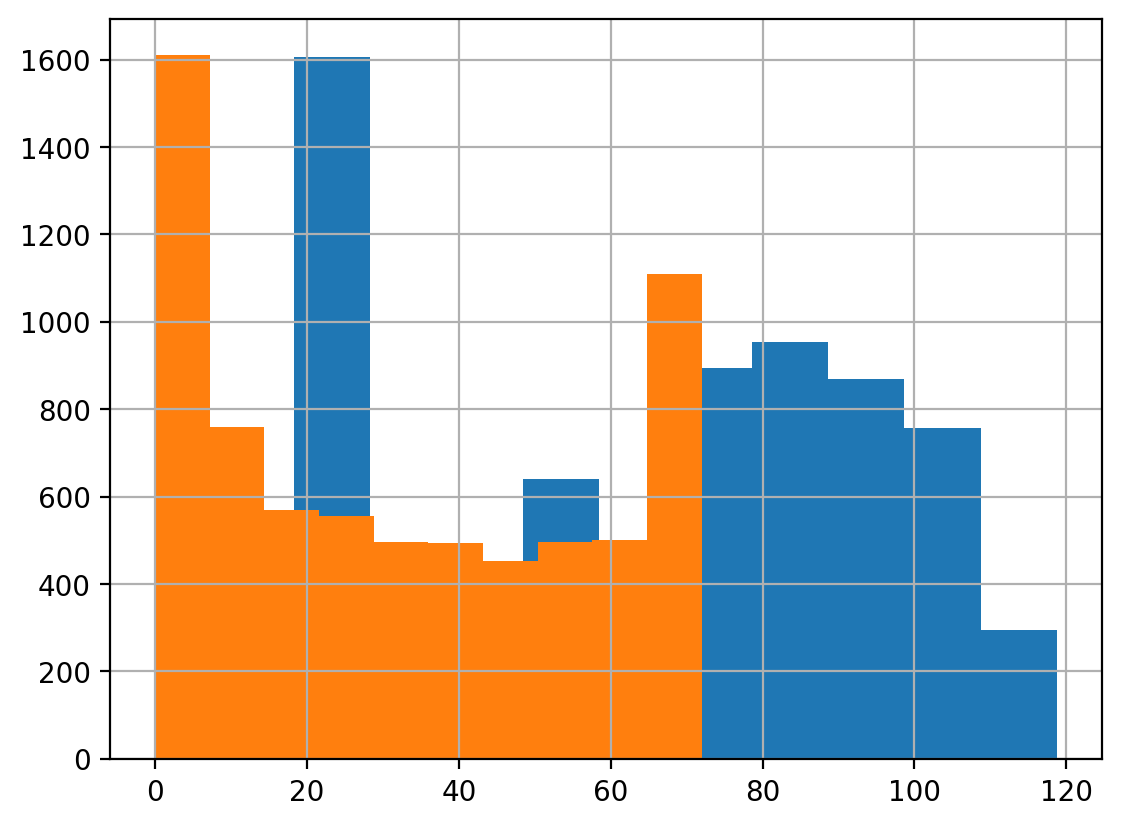

In [101]:
# distributions of the data to check for narmalcy
charges_df.monthly_charges.hist()
charges_df.tenure.hist()

These distributions are not normal, so we will use spearmans test. 

In [102]:
α = 0.05

In [103]:

r, p = stats.spearmanr(charges_df.tenure, charges_df.monthly_charges) # no order necessary
def eval_result(alpha, p):
    if p < α:
        print( f'reject the null hypothesis.there is a linear correalation better monthly charges and tenure (p-value: {p})')
    else:
        print(f'we fail to reject the null hypothesis that there is a linear correalation between monthly charges and tenure (p-value: {p})')

eval_result(alpha, p)      

NameError: name 'alpha' is not defined

**Takeaways**

There is a correlation between monthly charges and tenure. 
With an ro of .28, we can say that 

Does Tenure correlate with total charges?

H_0: There is no linear correlation between tenure and total charges.
H_a: There is a linear correlation between tenure and total charges.

In [ ]:
α = 0.05 

# Select the data
ttl_charges_df = df[['tenure', 'total_charges']]

In [ ]:
# look at summary of dataframe
ttl_charges_df.info()
ttl_charges_df.total_charges.sort_values()

# try to find data errors
ttl_charges_df.total_charges.sort_values()

# convert the empty space to '0'
ttl_charges_df['total_charges']= ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')
#ttl_charges_df['total_charges'] = [0 for x in ttl_charges_df.total_charges if x==' ']

In [ ]:
#confirm our datatypes
ttl_charges_df.info()

In [ ]:
sns.regplot(x = 'tenure', y='total_charges', data= ttl_charges_df,
           marker='.', line_kws={'color': 'rebeccapurple'})

In [ ]:
# Check assumptions

In [ ]:
Because these are not normally distributed, we will use a spearman's test.


In [ ]:
# run our test
r, p = stats.spearmanr(ttl_charges_df.tenure, ttl_charges_df.total_charges)
eval_result(α, p)   

**Takeaways**

There is a linear core between tenure and total charges.
With an r of .89, the correalation is strong.

In [ ]:
Of customers who have only phone service:
H_0: there is no linear correlation between tenure and monthly charges. 
H_a: there is a linear correlation between tenure and monthly charges.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1739 entries, 0 to 7041
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           1739 non-null   int64  
 1   monthly_charges  1739 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 40.8 KB


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

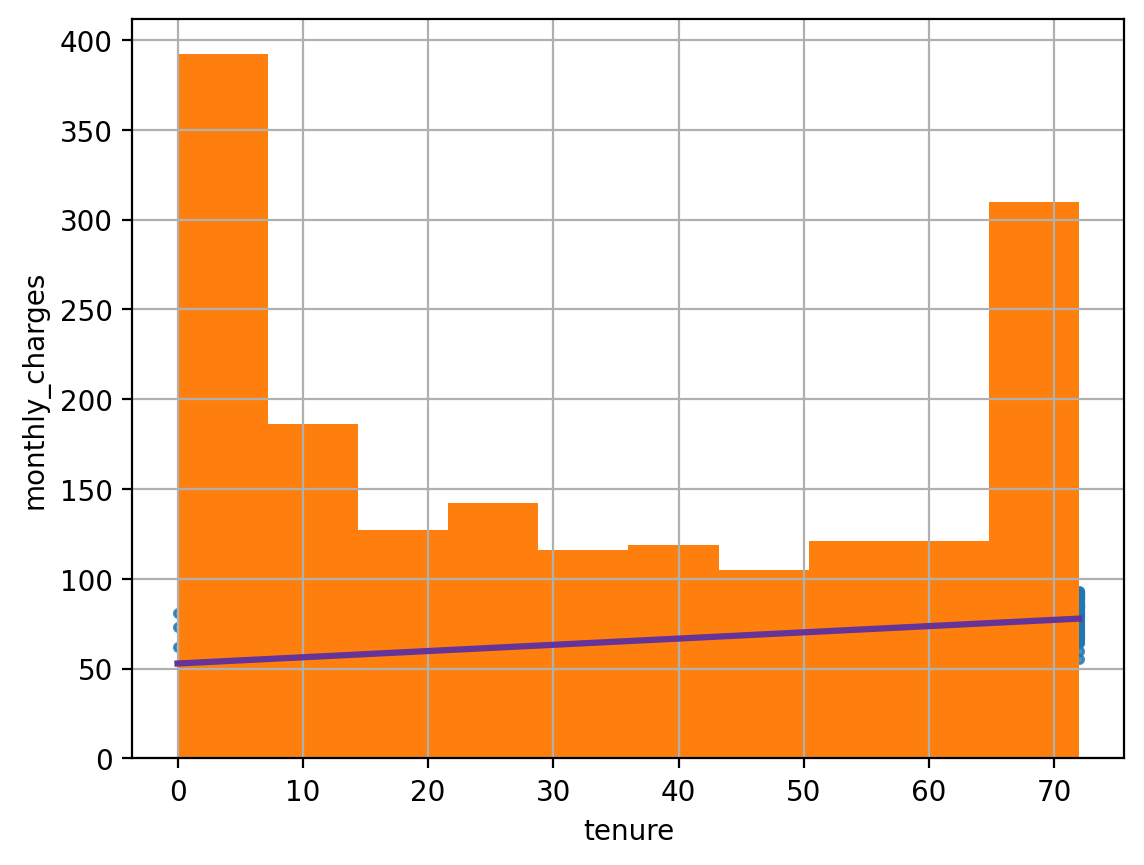

In [104]:
#customers who have phone service and no internet. 
# set alpha
α = 0.05

# select the data
phone_df = df[(df.phone_service == 'Yes') & (df.internet_service_type_id ==1)][['tenure', 'monthly_charges']]

phone_df.info()

#plot data
sns.regplot(x='tenure', y='monthly_charges', data=phone_df, marker='.', line_kws = ({'color': 'rebeccapurple'}))

#Check for normal distribution

phone_df.tenure.hist()


We will use spearmans test due to violation of assumption of normality

In [105]:
stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)

eval_result(α,p)
print(f'r value ={r}')

reject the null hypothesis.there is a linear correalation better monthly charges and tenure (p-value: 1.0271266876409408e-123)
r value =0.27641678933130215


**Takeaways**

There is a moderate-strong correlation between tenure and monthly charges for customers who have only phone service. 

In [106]:
url = get_db_url(env.username, env.password, env.host, db='employees')

query = '''
SELECT *
FROM employees
JOIN salaries USING (emp_no)
WHERE to_date = '9999-01-1';
'''

In [107]:
df = pd.read_sql(query, url)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240124 entries, 0 to 240123
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      240124 non-null  int64 
 1   birth_date  240124 non-null  object
 2   first_name  240124 non-null  object
 3   last_name   240124 non-null  object
 4   gender      240124 non-null  object
 5   hire_date   240124 non-null  object
 6   salary      240124 non-null  int64 
 7   from_date   240124 non-null  object
 8   to_date     240124 non-null  object
dtypes: int64(2), object(7)
memory usage: 16.5+ MB


In [109]:
H_O: there is no linear correlation between employee tenure and salary.
H_a: there is a linear correlation between employee tenure and salary.

SyntaxError: invalid syntax (526564280.py, line 1)

In [ ]:
α = .05
df['tenure'] = pd.to_datetime("today") - pd.to_datetime(df.hire_date)
df['tenure']= df.tenure.astype('str').str.split(' ', expand=True)[0].astype('int')



In [ ]:
# df.info()
tenure_df = df[['tenure', 'salary']]

In [ ]:
sns.regplot(x= 'tenure', y='salary', data=tenure_df, marker='.', line_kws=({'color': 'firebrick'}))

In [ ]:
tenure_df.tenure.hist()
plt.title('tenure')
plt.show()
tenure_df.salary.hist()
plt.title('salary')

In [ ]:
Distributions are not normal, so we will use spearmans test

In [ ]:
r, p = stats.spearmanr(tenure_df.tenure, tenure_df.salary)

eval_result(α, p)

print('r value: ', r)

In [ ]:
Takeaways
There is a moderate correlation between tenure and salary.

H_0: There is no linear correlation between tenure and number of titles.
H_a: there is a linear correlation between tenure and number of titles. 


In [ ]:
α = .05

#Select data

In [ ]:
url = get_db_url(env.username, env.password, env.host, db='employees')

query = '''
SELECT t.emp_no, count(title) as num_titles, te.tenure
from titles t
JOIN(
SELECT emp_no, min(from_date), max(to_date), datediff(now(), min(from_date)) AS tenure
FROM titles
GROUP BY emp_no
HAVING max(to_date)= '9999-01-01') te USING (emp_no)
GROUP BY t.emp_no;
'''

In [ ]:
df = pd.read_sql(query, url)

In [ ]:
df.info()

In [ ]:
df = df[['num_titles', 'tenure']]

In [ ]:
# plot the data
sns.regplot(x='tenure', y='num_titles', data=df, marker='.', line_kws=({'color': 'seagreen'}))

Because the number of titles is a discrete value, we should run a ANOVA or a kruskal wallis test to test whether the average salary of those with 1 title is different from those with 2, or 2 different from 3, etc. 

Assumptions: 
- do they have equal variance? 
- Are there enough observations?
- Are they independent of each other? 

In [ ]:
# equal variance?
# h_o the variance is equal
#h_a the variances are significantly different

stats.levene(df.num_titles, df.tenure)

In [ ]:
stats.kruskal(df.num_titles, df.tenure)

There is a difference between tenure and number of titles an employee has held. 

In [ ]:
from pydataset import data
df = data('sleepstudy')
df.info()
df.head()

In [ ]:
H_0: There is no linear correlation between days and reaction time
H_a: There is a linear correlation between days and reaction time
    
α = .05

In [ ]:
df = df[['Reaction', 'Days']]

sns.regplot(x='Days', y='Reaction', data=df, marker='.', line_kws={'color': 'seagreen'})

In [ ]:
days is uniformally distributed, and reaction time is normally distributed.

In [ ]:
# run the spearman test

stats.spearmanr(df.Days, df.Reaction)
eval_result(α, p)
print('r value: ', r)

In [ ]:
There is a moderate correlation between days and reaction time. 